In [1]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense

from sklearn.feature_selection import RFECV

from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
# Reading the red-wine data.
red_data = pd.read_csv('/content/winequality-red.csv', delimiter = ';')
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
red_data.isnull().sum()
# The data does not have any missing values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
# Selecting features from the dataset
X_red = red_data.drop('quality', axis = 1)

# Selecting target vector from the dataset
y_red = red_data['quality']

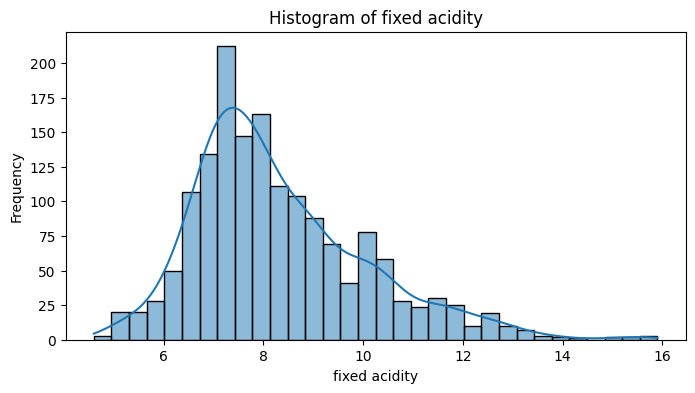

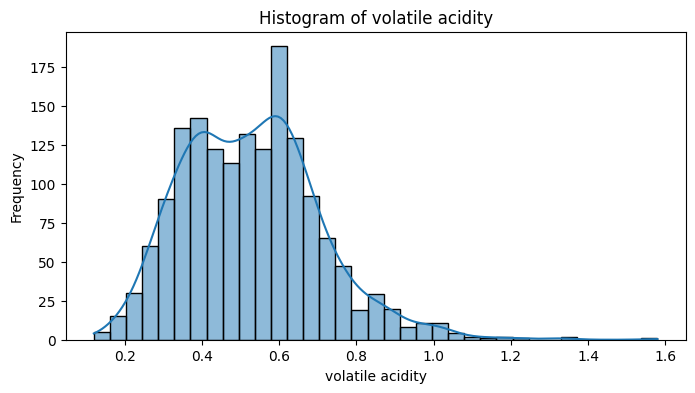

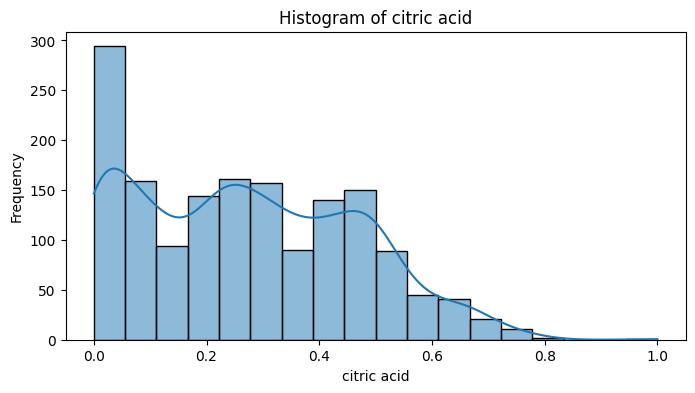

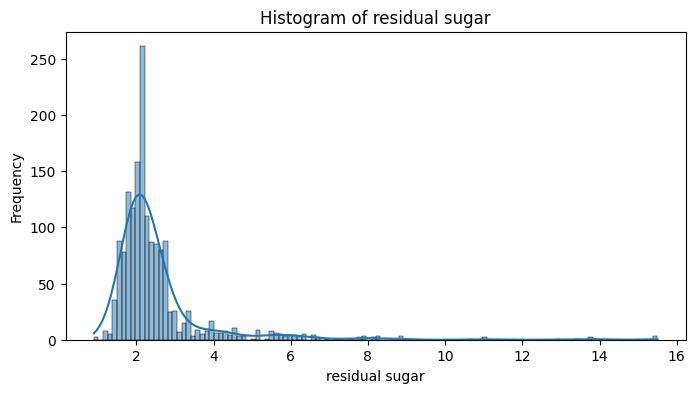

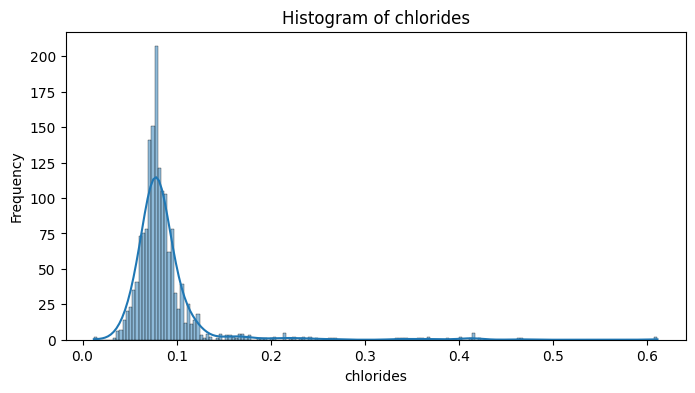

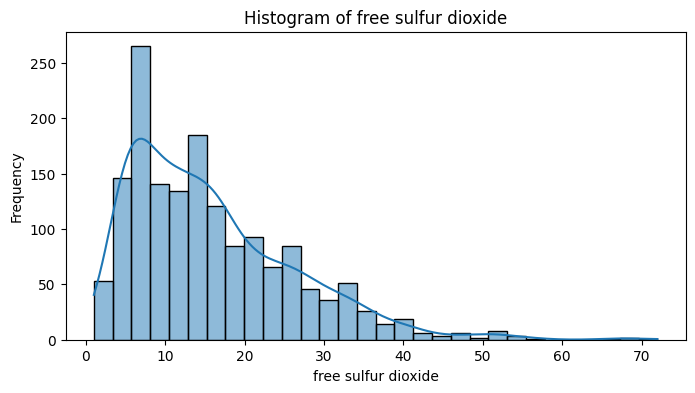

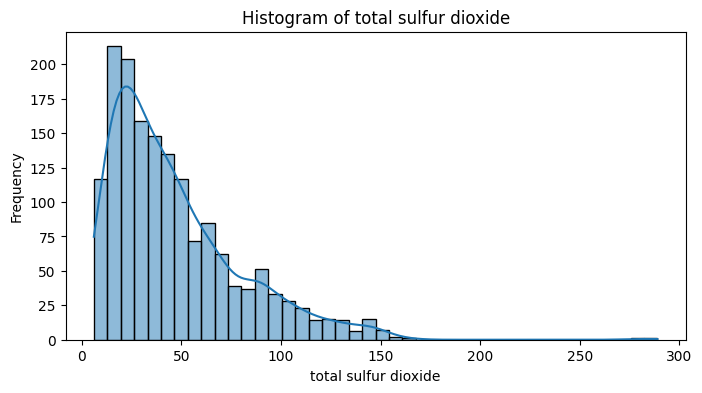

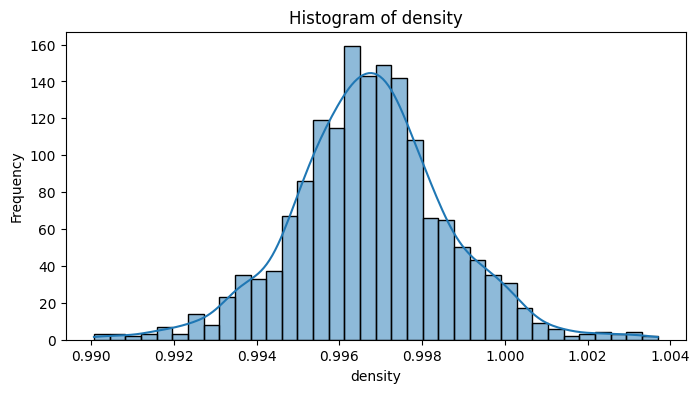

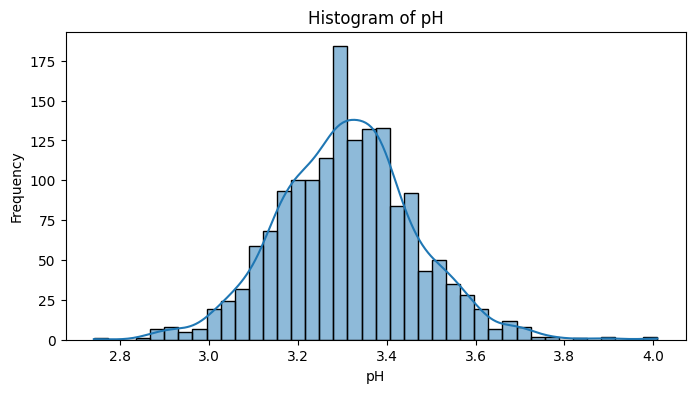

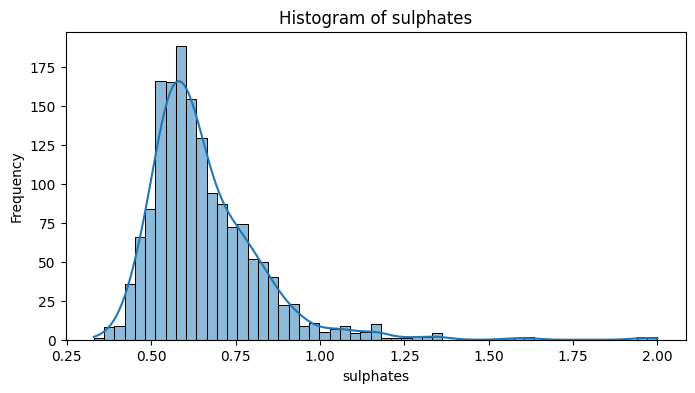

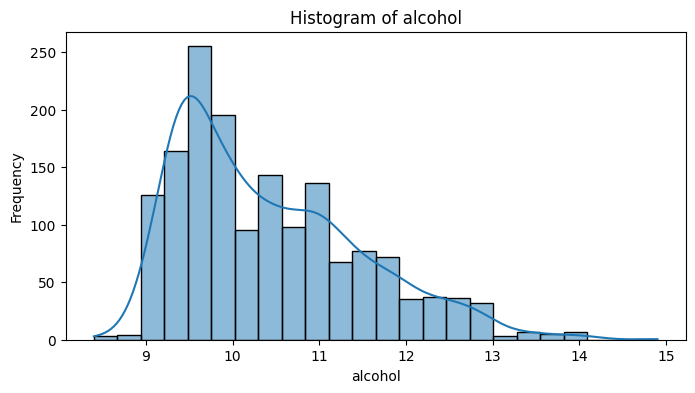

In [5]:
# Visualising the distribution of the values of each feature
for column in X_red.columns:
  plt.figure(figsize=(8, 4))
  sns.histplot(X_red[column], kde = True)
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

<Axes: >

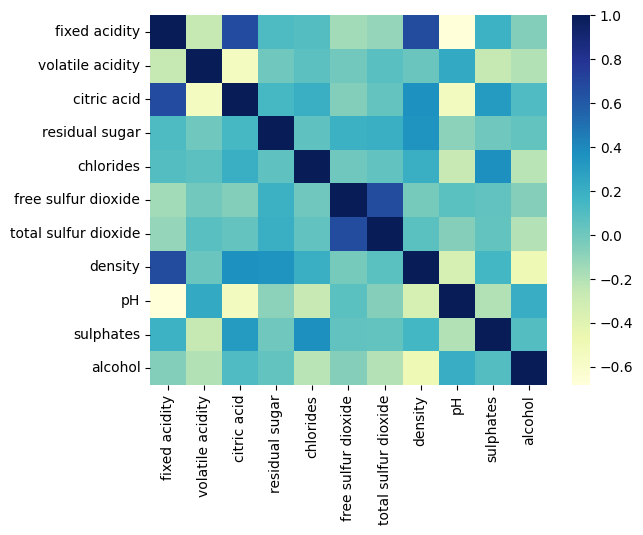

In [6]:
# Visualising the correlation of the features, since there are less features we can let the features with a relatively high correlation be in the model.
corr_matrix_red = X_red.corr()
sns.heatmap(corr_matrix_red, cmap = "YlGnBu")

In [7]:
# Spiltting the dataset into training and validation data.
X_red_train, X_red_valid, y_red_train, y_red_valid = train_test_split(X_red, y_red, test_size=0.2, random_state=21)

# Arrays varying the hyperparameters of the classifier.
max_depth_values = [30, 50, 70, 90]
n_estimators_values = [200, 300, 400, 500]

#Variables to store some parameters for the final classifier.
best_accuracy = 0
best_model = None
best_max_depth = None
best_n_estimators = None

#Loop to generate the best model out of all the hyperparameters combination.
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:

        # Create and train the Random Forest classifier with the current hyperparameters
        rf_classifier_red = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=21)
        rf_classifier_red.fit(X_red_train, y_red_train)

        # Evaluating the model on the validation set
        y_pred = rf_classifier_red.predict(X_red_valid)
        accuracy = accuracy_score(y_red_valid, y_pred)

        # Print validation accuracy for each hyperparameter value
        print(f"Validation Accuracy (n_estimators={n_estimators}, max_depth={max_depth}): {accuracy}")

        # Checking to see if this model is better than the previous one.
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = rf_classifier_red
            best_max_depth = max_depth
            best_n_estimators = n_estimators

# Printing the best model.
print(f"\nBest Model for red-wine data (n_estimators={best_n_estimators}, max_depth={max_depth}) Validation Accuracy: {best_accuracy}")

Validation Accuracy (n_estimators=200, max_depth=30): 0.690625
Validation Accuracy (n_estimators=300, max_depth=30): 0.68125
Validation Accuracy (n_estimators=400, max_depth=30): 0.684375
Validation Accuracy (n_estimators=500, max_depth=30): 0.68125
Validation Accuracy (n_estimators=200, max_depth=50): 0.690625
Validation Accuracy (n_estimators=300, max_depth=50): 0.68125
Validation Accuracy (n_estimators=400, max_depth=50): 0.684375
Validation Accuracy (n_estimators=500, max_depth=50): 0.68125
Validation Accuracy (n_estimators=200, max_depth=70): 0.690625
Validation Accuracy (n_estimators=300, max_depth=70): 0.68125
Validation Accuracy (n_estimators=400, max_depth=70): 0.684375
Validation Accuracy (n_estimators=500, max_depth=70): 0.68125
Validation Accuracy (n_estimators=200, max_depth=90): 0.690625
Validation Accuracy (n_estimators=300, max_depth=90): 0.68125
Validation Accuracy (n_estimators=400, max_depth=90): 0.684375
Validation Accuracy (n_estimators=500, max_depth=90): 0.68125


In [8]:
# Training the model on red-wine data with the best hyperparameter values
rf_classifier_red = RandomForestClassifier(n_estimators=200, max_depth=90, random_state=21)
rf_classifier_red.fit(X_red_train, y_red_train)

RandomForestClassifier(max_depth=90, n_estimators=200, random_state=21)

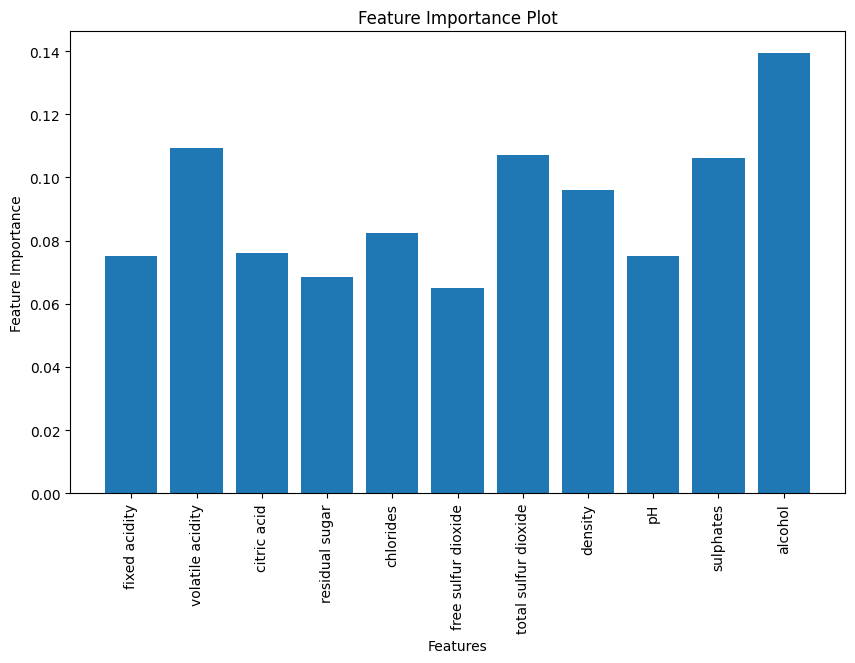

In [9]:
# Code to check feature importance of all the features in the red-wine data.
feature_importances_red = rf_classifier_red.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_red)), feature_importances_red, tick_label=X_red.columns)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()

# SVR model on red-wine data

In [10]:
# Array of hyperparameters for SVR classifier
C_values = [0.1, 1, 10, 100]
epsilon_values = [0.1, 0.2, 0.5]

#Variables to store some parameters for the final classifier.
best_mse = float('inf')
best_model = None
best_C = None
best_epsilon = None

for C in C_values:
    for epsilon in epsilon_values:
        # Creating and training the SVR model with the current hyperparameters.
        svr_model = SVR(kernel='rbf', C=C, epsilon = epsilon)
        svr_model.fit(X_red_train, y_red_train)

        # Evaluating the model on the validation data
        y_pred = svr_model.predict(X_red_valid)
        mse = mean_squared_error(y_red_valid, y_pred)

        # Print validation MSE for each hyperparameter value
        print(f"Validation MSE for red-wine data(C={C}, epsilon={epsilon}): {mse}")

        # Checking to see if this model is better than the previous one.
        if mse < best_mse:
            best_mse = mse
            best_model = svr_model
            best_C = C
            best_epsilon = epsilon
# Printing the best model.
print(f"\nBest Model for red-wine data(C={best_C}, epsilon={best_epsilon}) Validation MSE: {best_mse}")


Validation MSE for red-wine data(C=0.1, epsilon=0.1): 0.630825390512291
Validation MSE for red-wine data(C=0.1, epsilon=0.2): 0.6175325182220324
Validation MSE for red-wine data(C=0.1, epsilon=0.5): 0.6820330613029093
Validation MSE for red-wine data(C=1, epsilon=0.1): 0.5511226482691601
Validation MSE for red-wine data(C=1, epsilon=0.2): 0.5365609244494172
Validation MSE for red-wine data(C=1, epsilon=0.5): 0.6383238626119535
Validation MSE for red-wine data(C=10, epsilon=0.1): 0.4643009934669216
Validation MSE for red-wine data(C=10, epsilon=0.2): 0.46406544280049733
Validation MSE for red-wine data(C=10, epsilon=0.5): 0.48849146021981243
Validation MSE for red-wine data(C=100, epsilon=0.1): 0.4153996777566851
Validation MSE for red-wine data(C=100, epsilon=0.2): 0.4164459351575829
Validation MSE for red-wine data(C=100, epsilon=0.5): 0.43527339503256723

Best Model for red-wine data(C=100, epsilon=0.1) Validation MSE: 0.4153996777566851


In [11]:
# Reading the red-wine data.
white_data = pd.read_csv('/content/winequality-white.csv', delimiter = ';')
white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [12]:
white_data.isnull().sum()
# The data does not have any missing values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# Selecting features from the dataset
X_white = white_data.drop('quality', axis = 1)

# Selecting target vector from the dataset
y_white = white_data['quality']

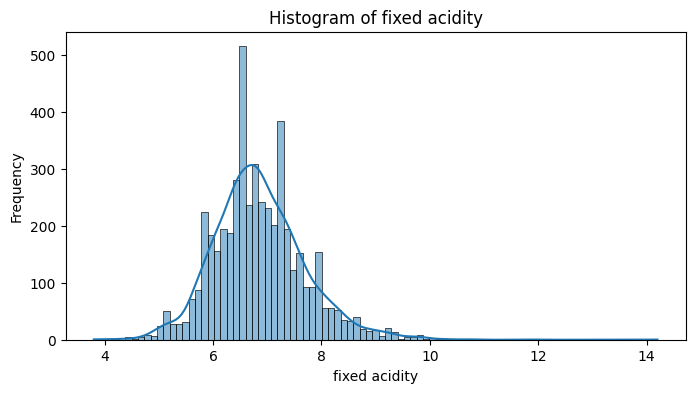

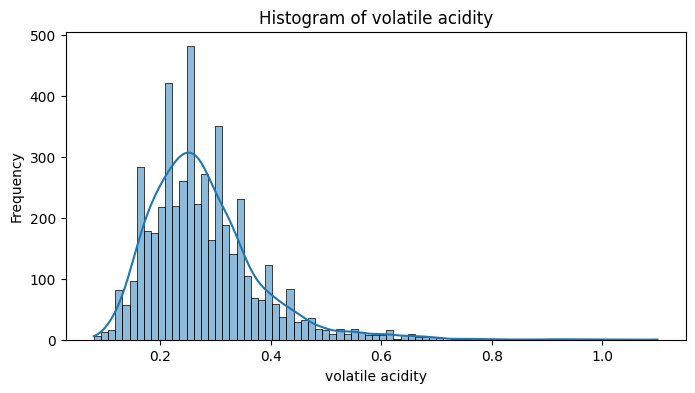

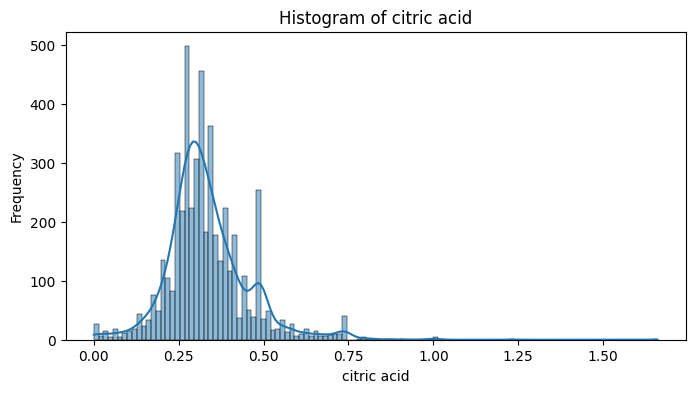

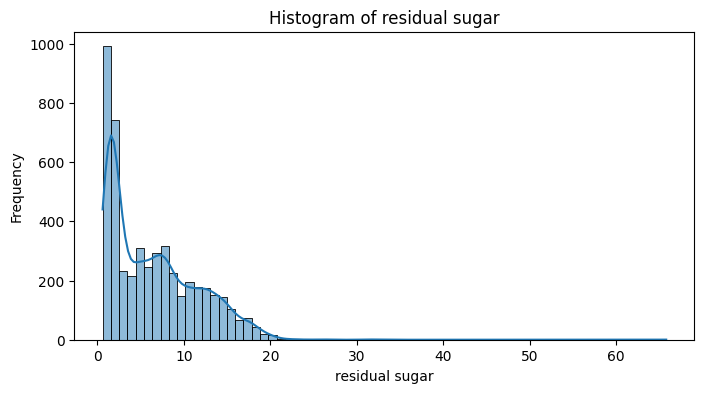

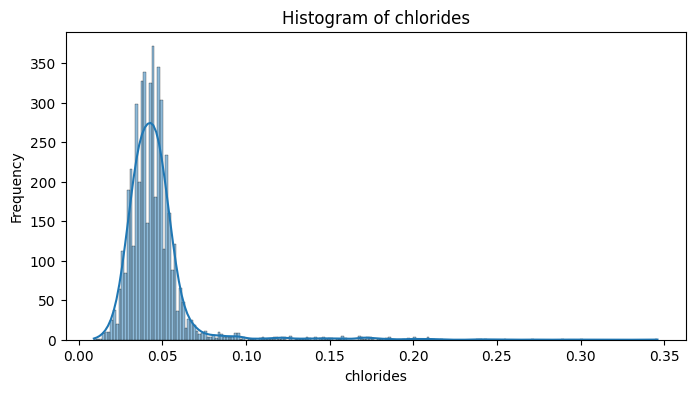

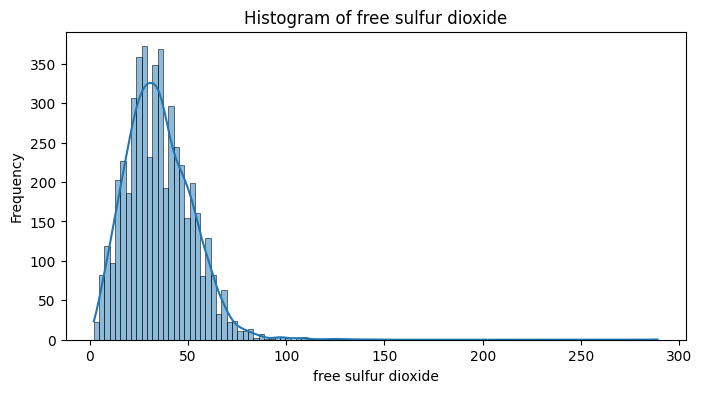

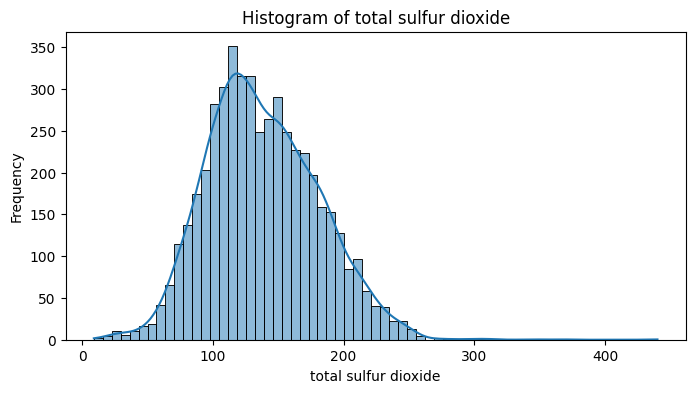

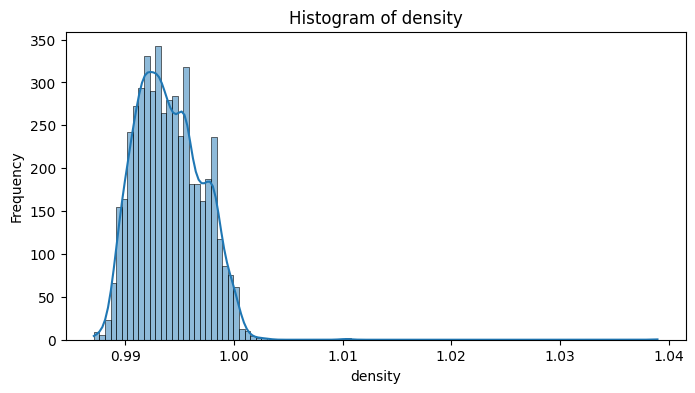

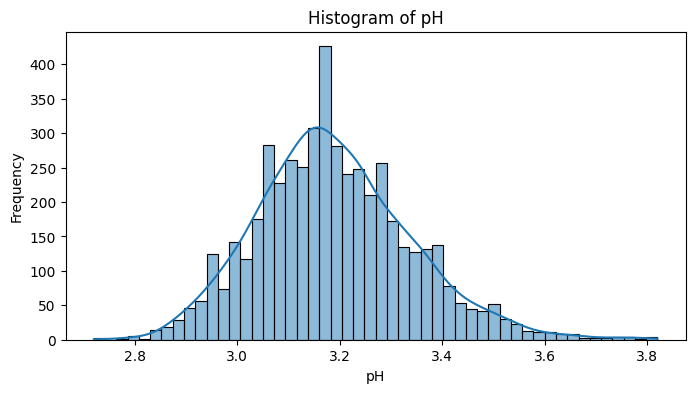

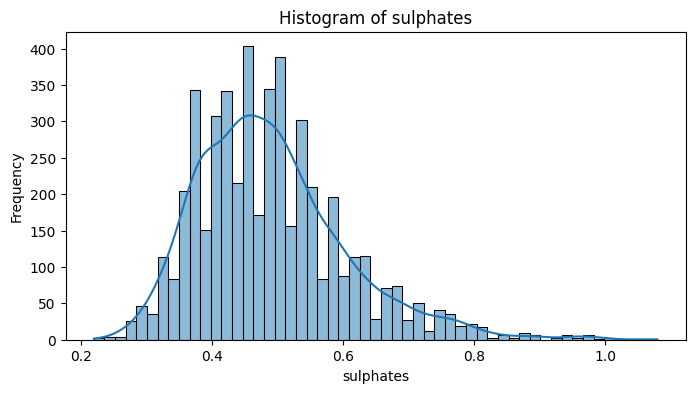

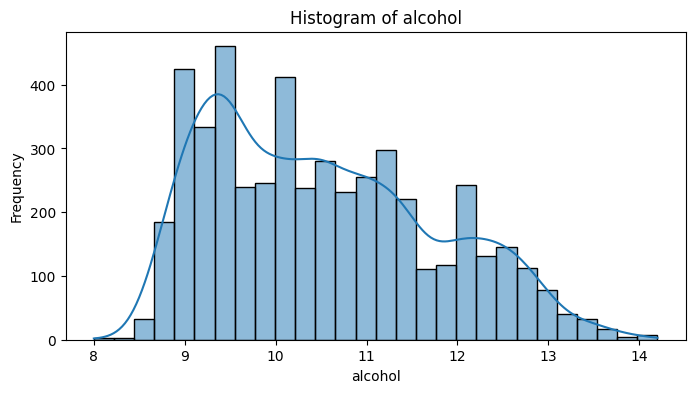

In [14]:
# Visualising the distribution of the values of each feature
for column in X_white.columns:
  plt.figure(figsize=(8, 4))
  sns.histplot(X_white[column], kde = True)
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

<Axes: >

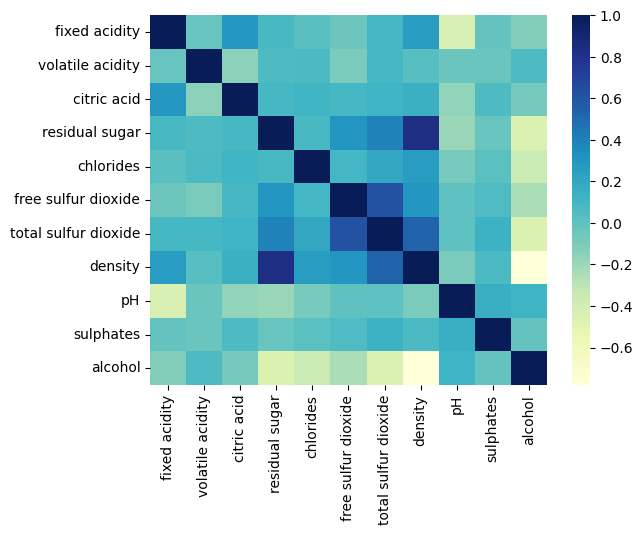

In [15]:
# Visualising the correlation of the features, since there are less features we can let the features with a relatively high correlation be in the model.
corr_matrix_white = X_white.corr()
sns.heatmap(corr_matrix_white, cmap = "YlGnBu")

In [16]:
#Splitting the dataset into training an dvalidation data
X_white_train, X_white_valid, y_white_train, y_white_valid = train_test_split(X_white, y_white, test_size=0.2, random_state=21)

max_depth_values = [30, 50, 70, 90]
n_estimators_values = [200, 300, 400, 500]

best_accuracy = 0
best_model = None
best_max_depth = None
best_n_estimators = None

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Create and train the Random Forest classifier with the current hyperparameters
        rf_classifier_white = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=21)
        rf_classifier_white.fit(X_white_train, y_white_train)

        # Evaluating the model on the validation set
        y_pred = rf_classifier_white.predict(X_white_valid)
        accuracy = accuracy_score(y_white_valid, y_pred)

        # Print validation accuracy for each hyperparameter value
        print(f"Validation Accuracy (n_estimators={n_estimators}, max_depth={max_depth}): {accuracy}")

        # Check if this model is better than the previous best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = rf_classifier_white
            best_max_depth = max_depth
            best_n_estimators = n_estimators

# Printing the best model
print(f"\nBest Model for white-wine data (n_estimators={best_n_estimators}, max_depth={max_depth}) Validation Accuracy: {best_accuracy}")

Validation Accuracy (n_estimators=200, max_depth=30): 0.6877551020408164
Validation Accuracy (n_estimators=300, max_depth=30): 0.6806122448979591
Validation Accuracy (n_estimators=400, max_depth=30): 0.6816326530612244
Validation Accuracy (n_estimators=500, max_depth=30): 0.6836734693877551
Validation Accuracy (n_estimators=200, max_depth=50): 0.686734693877551
Validation Accuracy (n_estimators=300, max_depth=50): 0.6816326530612244
Validation Accuracy (n_estimators=400, max_depth=50): 0.6816326530612244
Validation Accuracy (n_estimators=500, max_depth=50): 0.6836734693877551
Validation Accuracy (n_estimators=200, max_depth=70): 0.686734693877551
Validation Accuracy (n_estimators=300, max_depth=70): 0.6816326530612244
Validation Accuracy (n_estimators=400, max_depth=70): 0.6816326530612244
Validation Accuracy (n_estimators=500, max_depth=70): 0.6836734693877551
Validation Accuracy (n_estimators=200, max_depth=90): 0.686734693877551
Validation Accuracy (n_estimators=300, max_depth=90): 

In [17]:
# Training the model on red-wine data with the best hyperparameter values
rf_classifier_white = RandomForestClassifier(n_estimators=200, max_depth=90, random_state=21)
rf_classifier_white.fit(X_white_train, y_white_train)

RandomForestClassifier(max_depth=90, n_estimators=200, random_state=21)

# Testing feature importance on white-wine data and random forest classifier

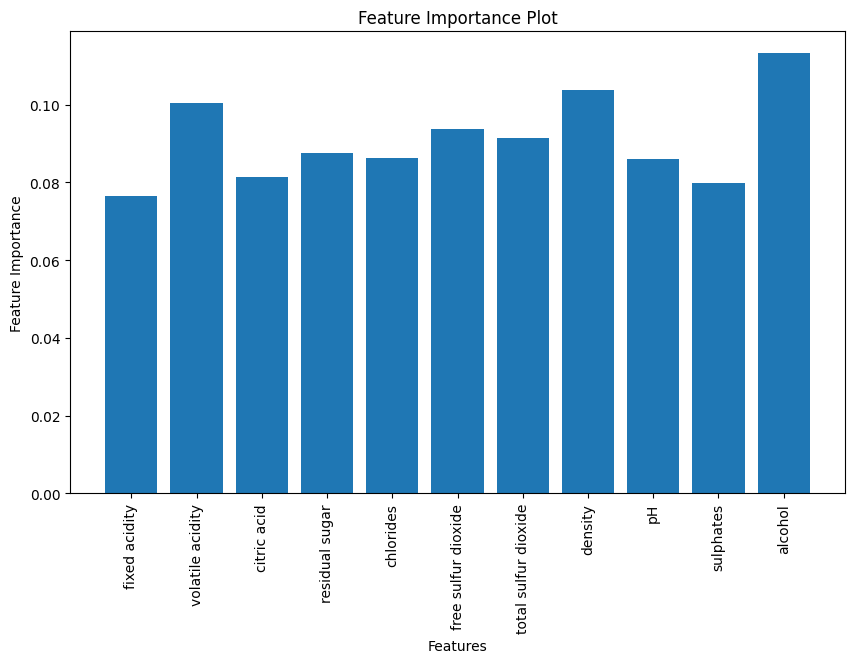

In [18]:
# Code to check feature importance of all the features in the white-wine data.
feature_importances_white = rf_classifier_white.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_white)), feature_importances_white, tick_label=X_white.columns)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()

# SVR model on white-wine data

In [19]:
# Array of hyperparameters for SVR classifier
C_values = [0.1, 1, 10, 100]
epsilon_values = [0.1, 0.2, 0.5]

# Arrays varying the hyperparameters of the classifier.
best_mse = float('inf')
best_model = None
best_C = None
best_epsilon = None

for C in C_values:
    for epsilon in epsilon_values:
        # Create and train the SVR model with the current hyperparameters
        svr_model = SVR(kernel='rbf', C=C, epsilon = epsilon)
        svr_model.fit(X_white_train, y_white_train)

        # Evaluate the model on the validation set
        y_pred = svr_model.predict(X_white_valid)
        mse = mean_squared_error(y_white_valid, y_pred)

        # Print validation MSE for each hyperparameter value
        print(f"Validation MSE for white-wine data(C={C}, epsilon={epsilon}): {mse}")

        # Check if this model is better than the previous best model
        if mse < best_mse:
            best_mse = mse
            best_model = svr_model
            best_C = C
            best_epsilon = epsilon

print(f"\nBest Model for white-wine data(C={best_C}, epsilon={best_epsilon}) Validation MSE: {best_mse}")

Validation MSE for white-wine data(C=0.1, epsilon=0.1): 0.680156686605208
Validation MSE for white-wine data(C=0.1, epsilon=0.2): 0.6678983512200197
Validation MSE for white-wine data(C=0.1, epsilon=0.5): 0.6861175865458772
Validation MSE for white-wine data(C=1, epsilon=0.1): 0.633701142588011
Validation MSE for white-wine data(C=1, epsilon=0.2): 0.6141897252483872
Validation MSE for white-wine data(C=1, epsilon=0.5): 0.6226966613873951
Validation MSE for white-wine data(C=10, epsilon=0.1): 0.5597519089945668
Validation MSE for white-wine data(C=10, epsilon=0.2): 0.5589450826938521
Validation MSE for white-wine data(C=10, epsilon=0.5): 0.5555827666115984
Validation MSE for white-wine data(C=100, epsilon=0.1): 0.5465265655288565
Validation MSE for white-wine data(C=100, epsilon=0.2): 0.5364432969382059
Validation MSE for white-wine data(C=100, epsilon=0.5): 0.5344698926381952

Best Model for white-wine data(C=100, epsilon=0.5) Validation MSE: 0.5344698926381952


# Trying the best fit model for red-wine data on white-wine data

In [20]:
y_pred = rf_classifier_red.predict(X_white_valid)
accuracy = accuracy_score(y_white_valid, y_pred)

print(f"Validation Accuracy of red-wine model on white-wine data (n_estimators = 200, n_estimators = 90): {accuracy}")

Validation Accuracy of red-wine model on white-wine data (n_estimators = 200, n_estimators = 90): 0.4683673469387755


# Trying the best fit model for white-wine data on red-wine data

In [21]:
y_pred = rf_classifier_white.predict(X_red_valid)
accuracy = accuracy_score(y_red_valid, y_pred)

print(f"Validation Accuracy of white-wine model on red-wine data (n_estimators = 200, n_estimators = 90): {accuracy}")

Validation Accuracy of white-wine model on red-wine data (n_estimators = 200, n_estimators = 90): 0.3875


In [22]:
# Reading the mice data.
mice_data = pd.read_excel('/content/Data_Cortex_Nuclear.xls')
mice_data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [23]:
# Code to get number of maissing values in each columns.
missing_values_dict = {}
for column in mice_data.columns:
    missing_values_count = mice_data[column].isna().sum()

    missing_values_dict[column] = missing_values_count

print(missing_values_dict)

{'MouseID': 0, 'DYRK1A_N': 3, 'ITSN1_N': 3, 'BDNF_N': 3, 'NR1_N': 3, 'NR2A_N': 3, 'pAKT_N': 3, 'pBRAF_N': 3, 'pCAMKII_N': 3, 'pCREB_N': 3, 'pELK_N': 3, 'pERK_N': 3, 'pJNK_N': 3, 'PKCA_N': 3, 'pMEK_N': 3, 'pNR1_N': 3, 'pNR2A_N': 3, 'pNR2B_N': 3, 'pPKCAB_N': 3, 'pRSK_N': 3, 'AKT_N': 3, 'BRAF_N': 3, 'CAMKII_N': 3, 'CREB_N': 3, 'ELK_N': 18, 'ERK_N': 3, 'GSK3B_N': 3, 'JNK_N': 3, 'MEK_N': 7, 'TRKA_N': 3, 'RSK_N': 3, 'APP_N': 3, 'Bcatenin_N': 18, 'SOD1_N': 3, 'MTOR_N': 3, 'P38_N': 3, 'pMTOR_N': 3, 'DSCR1_N': 3, 'AMPKA_N': 3, 'NR2B_N': 3, 'pNUMB_N': 3, 'RAPTOR_N': 3, 'TIAM1_N': 3, 'pP70S6_N': 3, 'NUMB_N': 0, 'P70S6_N': 0, 'pGSK3B_N': 0, 'pPKCG_N': 0, 'CDK5_N': 0, 'S6_N': 0, 'ADARB1_N': 0, 'AcetylH3K9_N': 0, 'RRP1_N': 0, 'BAX_N': 0, 'ARC_N': 0, 'ERBB4_N': 0, 'nNOS_N': 0, 'Tau_N': 0, 'GFAP_N': 0, 'GluR3_N': 0, 'GluR4_N': 0, 'IL1B_N': 0, 'P3525_N': 0, 'pCASP9_N': 0, 'PSD95_N': 0, 'SNCA_N': 0, 'Ubiquitin_N': 0, 'pGSK3B_Tyr216_N': 0, 'SHH_N': 0, 'BAD_N': 213, 'BCL2_N': 285, 'pS6_N': 0, 'pCFOS_N': 7

In [24]:
# Removing the columns with more than three missing value.
columns_to_be_dropped = [key for key in missing_values_dict if missing_values_dict[key] > 3]

columns_to_be_dropped

for column in columns_to_be_dropped:
    mice_data.drop(column, axis = 1, inplace = True)

mice_data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [25]:
# Selecting features columns
mice_data_features = mice_data[mice_data.columns[0:-4]]
mice_data_features.drop(columns = ['MouseID'], inplace = True)
mice_data_features

<ipython-input-25-9c9aa602c6df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mice_data_features.drop(columns = ['MouseID'], inplace = True)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.326362,1.323554,2.578046,0.167181,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.344160,1.275605,2.534347,0.169592,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.358114,1.437534,2.544515,0.179692,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.352279,1.498820,2.609769,0.185037,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031


<Axes: >

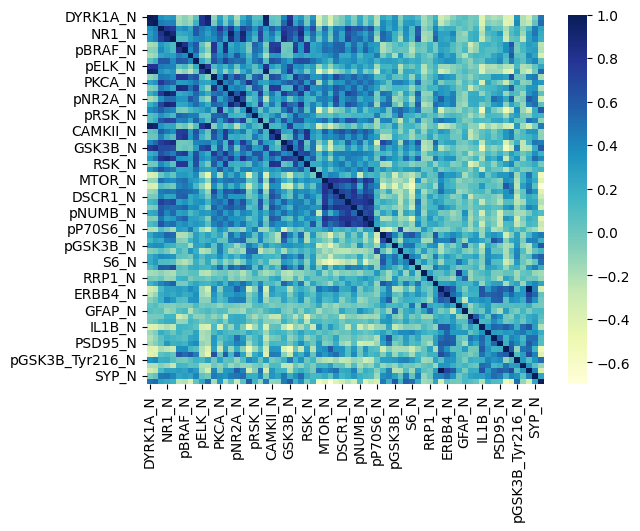

In [29]:
# Visualising the correlation among the features, since there are a large amount of featues, we can drop the ones with high correlation values.
heat = mice_data_features.corr()
sns.heatmap(heat, cmap = "YlGnBu")

In [30]:
print(mice_data_features.shape)
print(heat.shape)

(1080, 68)
(68, 68)


In [31]:
# Dropping the features with a correlaton value higher than 0.9
count = 0
for i in range(len(mice_data_features.columns)):
  for j in range(i+1, len(mice_data_features.columns)):
    if abs(heat.iloc[i,j]) >= 0.9:
        print(mice_data_features.columns[i-count])                                # (i - count), accounting for the previously removed column indices also, before dropping next ones
        mice_data_features = mice_data_features.drop(columns = mice_data_features.columns[i - count], axis = 1)
        count += 1

DYRK1A_N
CaNA_N
pS6_N
SHH_N
Ubiquitin_N
pGSK3B_Tyr216_N
pAKT_N
pELK_N


In [32]:
# Imputing the missin data in the dataset
mice_data_imp = mice_data_features
imp = IterativeImputer(max_iter = 11, random_state = 21)

imputed = imp.fit(mice_data_imp)
mice_data_imp_tran = imp.transform(mice_data_imp)

mice_data_imputed = pd.DataFrame(mice_data_imp_tran, columns = mice_data_imp.columns)
final_imputed = pd.concat([mice_data_imputed, mice_data['Genotype'], mice_data['Treatment'], mice_data['Behavior'], mice_data['class']], axis = 1) # Concatenating the target vectors back to the dataset.



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [39]:
mice_data['class'].unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [34]:
# Selecting the column 'Genotype' as target vector.
mice_features = final_imputed[final_imputed.columns[:-4]]
mice_target = final_imputed[final_imputed.columns[-1]]

In [46]:
mice_target

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [48]:
# Code to convert the genotype category into binary form, 'Control' = 1 and 'Ts65Dn' = 0.
def binary_conversion(entry):
  if entry == "c-CS-m":
    return 0
  elif entry == "c-SC-m":
    return 1
  elif entry == "c-CS-s":
    return 2
  elif entry == "c-SC-s":
    return 3
  elif entry == "t-CS-m":
    return 4
  elif entry == "t-SC-m":
    return 5
  elif entry == "t-CS-s":
    return 6
  elif entry == "t-SC-s":
    return 7

In [50]:
# Splitting the dataset into training and validation data.
mice_train_features, mice_valid_features, mice_train_target, mice_valid_target = train_test_split(mice_features, mice_target, test_size=0.2, random_state=21)

# Converting the categorical data into binary data.
mice_train_target_binary = mice_train_target.apply(binary_conversion)
mice_valid_target_binary = mice_valid_target.apply(binary_conversion)
mice_valid_target_binary = np.array(mice_valid_target_binary)
mice_valid_target_binary = mice_valid_target_binary.reshape(-1, 1)  # Reshape to 2D array

# Different hyperparameter vaues for the classifier.
max_depth_values = [30, 50, 70, 90]
n_estimators_values = [200, 300, 400, 500]

#Variables to store the parameters.
best_accuracy = 0
best_model = None
best_max_depth = None
best_n_estimators = None

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Creating and training the Random Forest classifier with the current hyperparameters
        mice_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=21)
        mice_classifier.fit(mice_train_features, mice_train_target_binary)

        # Evaluating the model on the validation set
        y_pred = mice_classifier.predict(mice_valid_features)
        accuracy = accuracy_score(mice_valid_target_binary, y_pred)

        # Printing validation accuracy for each hyperparameter value
        print(f"Validation Accuracy (n_estimators={n_estimators}, max_depth={max_depth}): {accuracy}")

        # Checking if this model is better than the previous best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = rf_classifier_white
            best_max_depth = max_depth
            best_n_estimators = n_estimators

# Printing the best model
print(f"\nBest Model for mice data (n_estimators={best_n_estimators}, max_depth={max_depth}) Validation Accuracy: {best_accuracy}")


Validation Accuracy (n_estimators=200, max_depth=30): 0.9953703703703703
Validation Accuracy (n_estimators=300, max_depth=30): 0.9953703703703703
Validation Accuracy (n_estimators=400, max_depth=30): 0.9953703703703703
Validation Accuracy (n_estimators=500, max_depth=30): 0.9953703703703703
Validation Accuracy (n_estimators=200, max_depth=50): 0.9953703703703703
Validation Accuracy (n_estimators=300, max_depth=50): 0.9953703703703703
Validation Accuracy (n_estimators=400, max_depth=50): 0.9953703703703703
Validation Accuracy (n_estimators=500, max_depth=50): 0.9953703703703703
Validation Accuracy (n_estimators=200, max_depth=70): 0.9953703703703703
Validation Accuracy (n_estimators=300, max_depth=70): 0.9953703703703703
Validation Accuracy (n_estimators=400, max_depth=70): 0.9953703703703703
Validation Accuracy (n_estimators=500, max_depth=70): 0.9953703703703703
Validation Accuracy (n_estimators=200, max_depth=90): 0.9953703703703703
Validation Accuracy (n_estimators=300, max_depth=90

In [51]:
# Different hyperparameter values for the classifier.
hidden_layer_neurons = [50, 100, 200]

# Variables to store the parameters.
best_accuracy = 0
best_model = None
best_hidden_neurons = None

for neurons in hidden_layer_neurons:
    # Building the neural network model
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(mice_train_features.shape[1],)),
        Dense(10, activation='softmax')  # Assuming 10 output classes, adjust accordingly
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoded labels
                  metrics=['accuracy'])

    # Train the model
    model.fit(mice_train_features, mice_train_target_binary, epochs=10, batch_size=32, validation_data=(mice_valid_features, mice_valid_target_binary))

    # Evaluate the model
    y_pred = np.argmax(model.predict(mice_valid_features), axis=1)
    accuracy = accuracy_score(mice_valid_target_binary, y_pred)

    print(f"Validation Accuracy (hidden neurons={neurons}): {accuracy}")

    # Check if this model is better than the previous best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_hidden_neurons = neurons

# Select the best model
print(f"\nBest Model (hidden neurons={best_hidden_neurons}) Validation Accuracy: {best_accuracy}")


Epoch 1/10
27/27 [==============================] - 2s 12ms/step - loss: 2.3484 - accuracy: 0.1493 - val_loss: 2.1075 - val_accuracy: 0.1435
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 2.0209 - accuracy: 0.2558 - val_loss: 1.9783 - val_accuracy: 0.2639
Epoch 3/10
27/27 [==============================] - 0s 4ms/step - loss: 1.9085 - accuracy: 0.3530 - val_loss: 1.8848 - val_accuracy: 0.2593
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 1.8364 - accuracy: 0.3623 - val_loss: 1.8027 - val_accuracy: 0.3333
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 1.7490 - accuracy: 0.4433 - val_loss: 1.7464 - val_accuracy: 0.3056
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 1.6901 - accuracy: 0.4086 - val_loss: 1.6709 - val_accuracy: 0.4074
Epoch 7/10
27/27 [==============================] - 0s 3ms/step - loss: 1.6228 - accuracy: 0.4618 - val_loss: 1.6174 - val_accuracy: 0.3889
Epoch 8/10
27/27 [=

In [52]:
base_classifier = RandomForestClassifier(n_estimators=100, random_state=21)

# Initializing RFECV with a base classifier (Random Forest Classifier) and cross-validation strategy
rfecv = RFECV(estimator=base_classifier, step=1, cv=5, scoring='accuracy')

# Fitting RFECV to the training data
rfecv.fit(mice_train_features, mice_train_target_binary)

# Getting the best number of features selected
optimal_num_features = rfecv.n_features_
selected_features = mice_train_features.columns[rfecv.support_]

# Training the model on the selected features
X_train_selected = rfecv.transform(mice_train_features)
X_valid_selected = rfecv.transform(mice_valid_features)
optimized_classifier = RandomForestClassifier(n_estimators=100, random_state=21)
optimized_classifier.fit(X_train_selected, mice_train_target_binary)

# Evaluating the classifier on the validation set
y_pred = optimized_classifier.predict(X_valid_selected)
accuracy = accuracy_score(mice_valid_target_binary, y_pred)

# Prints the best model accuracy
print(f"Validation Accuracy with {optimal_num_features} features: {accuracy}")
print("Selected Features:", selected_features)


Validation Accuracy with 50 features: 0.9953703703703703
Selected Features: Index(['ITSN1_N', 'NR2A_N', 'pCAMKII_N', 'pCREB_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR2A_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N',
       'CAMKII_N', 'GSK3B_N', 'JNK_N', 'TRKA_N', 'APP_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'pGSK3B_N', 'pPKCG_N',
       'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N',
       'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'IL1B_N',
       'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'SYP_N'],
      dtype='object')


In [53]:
# Different hyperparameter values for the classifier.
C_values = [0.1, 1, 10, 100]
epsilon_values = [0.1, 0.2, 0.5]

# Variables to store the parameters
best_mse = float('inf')
best_model = None
best_C = None
best_epsilon = None

for C in C_values:
    for epsilon in epsilon_values:
        # Training the SVR model with the current hyperparameters
        mice_svr_model = SVR(kernel='rbf', C=C, epsilon = epsilon)
        mice_svr_model.fit(mice_train_features, mice_train_target_binary)

        # Evaluating the model on the validation set
        y_pred = mice_svr_model.predict(mice_valid_features)
        mse = mean_squared_error(mice_valid_target_binary, y_pred)

        # Prints validation MSE for each hyperparameter value
        print(f"Validation MSE for white-wine data(C={C}, epsilon={epsilon}): {mse}")

        # Checks if this model is better than the previous best model
        if mse < best_mse:
            best_mse = mse
            best_model = mice_svr_model
            best_C = C
            best_epsilon = epsilon

print(f"\nBest Model for white-wine data(C={best_C}, epsilon={best_epsilon}) Validation MSE: {best_mse}")

Validation MSE for white-wine data(C=0.1, epsilon=0.1): 5.01676585173858
Validation MSE for white-wine data(C=0.1, epsilon=0.2): 5.0226058980024595
Validation MSE for white-wine data(C=0.1, epsilon=0.5): 5.0025108491541195
Validation MSE for white-wine data(C=1, epsilon=0.1): 3.301448141012957
Validation MSE for white-wine data(C=1, epsilon=0.2): 3.299167227555545
Validation MSE for white-wine data(C=1, epsilon=0.5): 3.3173675998804137
Validation MSE for white-wine data(C=10, epsilon=0.1): 1.604899963774052
Validation MSE for white-wine data(C=10, epsilon=0.2): 1.5925547213695854
Validation MSE for white-wine data(C=10, epsilon=0.5): 1.6177750571158445
Validation MSE for white-wine data(C=100, epsilon=0.1): 0.45119990761593154
Validation MSE for white-wine data(C=100, epsilon=0.2): 0.4556518463661479
Validation MSE for white-wine data(C=100, epsilon=0.5): 0.477321078237356

Best Model for white-wine data(C=100, epsilon=0.1) Validation MSE: 0.45119990761593154


In [ ]:
# # Create the SVR model with RBF kernel
# svr_model = SVR(kernel='rbf')

# # Create the RFECV object
# rfecv = RFECV(estimator=svr_model, cv=5)  # You can adjust cv parameter for cross-validation

# # Fit RFECV to the training data
# rfecv.fit(mice_train_features, mice_train_target_binary)

# # Print the selected features
# print("Optimal number of features:", rfecv.n_features_)
# print("Selected features:", mice_train_features.columns[rfecv.support_])

# # Transform the training and validation data to include only the selected features
# X_train_selected = rfecv.transform(mice_train_features)
# X_valid_selected = rfecv.transform(mice_valid_features)

# # Train the SVR model using only the selected features
# svr_model.fit(X_train_selected, mice_train_target_binary)

# # Predict on the validation set
# valid_predictions = svr_model.predict(X_valid_selected)

# # Calculate evaluation metrics (e.g., RMSE, R-squared)
# # For example:
# from sklearn.metrics import mean_squared_error, r2_score
# rmse = np.sqrt(mean_squared_error(mice_valid_target_binary, valid_predictions))
# r2 = r2_score(mice_valid_target_binary, valid_predictions)
# print("RMSE:", rmse)
# print("R-squared:", r2)


In [54]:
# License: BSD
# Author: Sasank Chilamkurthy


cudnn.benchmark = True
plt.ion()   # interactive mode

In [55]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


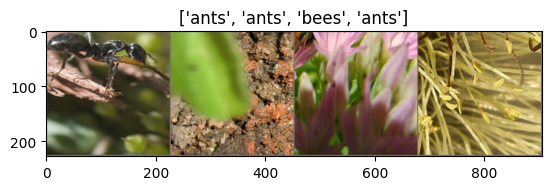

In [56]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [57]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [58]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [59]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.9MB/s]


In [60]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6173 Acc: 0.6803
val Loss: 0.2245 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.4106 Acc: 0.7992
val Loss: 0.2676 Acc: 0.8824

Epoch 2/24
----------
train Loss: 0.3647 Acc: 0.8238
val Loss: 0.1941 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.4320 Acc: 0.8156
val Loss: 0.4073 Acc: 0.8562

Epoch 4/24
----------
train Loss: 0.6127 Acc: 0.7787
val Loss: 0.5848 Acc: 0.8039

Epoch 5/24
----------
train Loss: 0.5077 Acc: 0.7869
val Loss: 0.3872 Acc: 0.8693

Epoch 6/24
----------
train Loss: 0.3421 Acc: 0.8566
val Loss: 0.2208 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.3979 Acc: 0.8525
val Loss: 0.1916 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.2427 Acc: 0.8811
val Loss: 0.1992 Acc: 0.9150

Epoch 9/24
----------
train Loss: 0.2713 Acc: 0.8811
val Loss: 0.2013 Acc: 0.9216

Epoch 10/24
----------
train Loss: 0.3101 Acc: 0.8975
val Loss: 0.2308 Acc: 0.8889

Epoch 11/24
----------
train Loss: 0.4038 Acc: 0.8361
val Loss: 0.1937 Acc: 0.9281

Ep

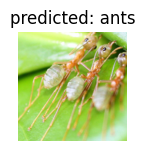

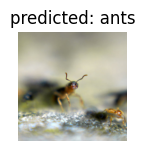

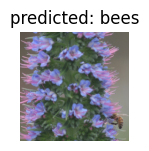

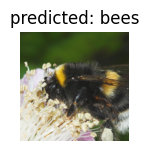

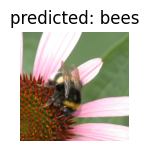

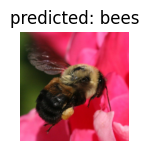

In [61]:
visualize_model(model_ft)

In [62]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [63]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5071 Acc: 0.7459
val Loss: 0.2299 Acc: 0.9150

Epoch 1/24
----------
train Loss: 0.5283 Acc: 0.7869
val Loss: 0.2017 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.4603 Acc: 0.7664
val Loss: 0.1708 Acc: 0.9346

Epoch 3/24
----------
train Loss: 0.5159 Acc: 0.7500
val Loss: 0.3868 Acc: 0.8431

Epoch 4/24
----------
train Loss: 0.3701 Acc: 0.8566
val Loss: 0.2505 Acc: 0.9020

Epoch 5/24
----------
train Loss: 0.4151 Acc: 0.8156
val Loss: 0.1670 Acc: 0.9412

Epoch 6/24
----------
train Loss: 0.4533 Acc: 0.8238
val Loss: 0.2017 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.3991 Acc: 0.8320
val Loss: 0.2169 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3526 Acc: 0.8402
val Loss: 0.1748 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3624 Acc: 0.8361
val Loss: 0.1749 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3895 Acc: 0.8115
val Loss: 0.2334 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3052 Acc: 0.8484
val Loss: 0.2102 Acc: 0.9412

Ep

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

In [66]:
image_paths = []
bee_train_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/train/bees'
ant_train_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/train/ants'

bee_val_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/val/bees'
ant_val_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/val/ants'

images_train = []
labels_train = []

images_val = []
labels_val = []

for filename in os.listdir(bee_train_dir):
  temp = os.path.join(bee_train_dir, filename)
  images_train.append(str(temp))
  labels_train.append(0)

for filename in os.listdir(ant_train_dir):
  temp = os.path.join(ant_train_dir, filename)
  images_train.append(str(temp))
  labels_train.append(1)

labels_train.remove(1)


for filename in os.listdir(bee_val_dir):
  temp = os.path.join(bee_val_dir, filename)
  images_val.append(str(temp))
  labels_val.append(0)

for filename in os.listdir(ant_val_dir):
  temp = os.path.join(ant_val_dir, filename)
  images_val.append(str(temp))
  labels_val.append(1)

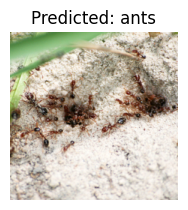

In [67]:
visualize_model_predictions(
    model_conv,
    img_path='/content/drive/MyDrive/hymenoptera_data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg'
)

plt.ioff()
plt.show()

In [68]:
def resnet18_features(img_path):
    model = models.resnet18(weights=True)                  # Remove the final fully-connected layer to get the 512 dimensional features
    modules = list(model.children())[:-1]                  # The final layer converts the features to 1000 dimensions
    model = torch.nn.Sequential(*modules)                  # Makes a list of all the layers except the final layer then sequentially stack them
    model.eval()                                           # Set the model to evaluation mode
    img = Image.open(img_path).convert('RGB')                          # Load and preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.485, 0.456, 0.406],
            [0.229, 0.224, 0.225]
        )
    ])
    img = transform(img)

    img = img.unsqueeze(0)
    with torch.no_grad():
        features = model(img)           # Get the ResNet18 features for the image
    features = features.squeeze()
    return features.numpy()             # Remove the batch dimension and return the features

img_train_features = []
coutn = 0
for i in images_train:
  if coutn == 172:                      # Encountered some error with the dimension for the 52nd image from the ants training dataset, so decided to just discard it.
    coutn +=1
    continue
  else:
    dee = resnet18_features(i)
    coutn += 1
    # print(coutn)
    img_train_features.append(dee)

img_val_features = []
for i in images_val:
  dee = resnet18_features(i)
  img_val_features.append(dee)

img_train_features = np.array(img_train_features)
img_val_features = np.array(img_val_features)
print(img_train_features.shape, img_val_features.shape)

# Printing the shape of the training and validation sets to ensure they are correct

x_train = img_train_features
y_train = np.array(labels_train)
# print(x_train.shape, y_train.shape)

x_val = img_val_features
y_val = np.array(labels_val)
# print(x_val.shape, y_val.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(244, 512) (153, 512)


In [69]:
print(img_train_features.shape, img_val_features.shape)

(244, 512) (153, 512)


best score for rbf kernel with accuracy scoring :  0.9630952380952381
best score for rbf kernel with f1 scoring :  0.963504766455077
best parameters with f1 metric :  {'C': 2.976351441631316, 'gamma': 0.001}
best parameters with accuracy metric :  {'C': 2.976351441631316, 'gamma': 0.001}
f1 score on testing for rbf kernel :  0.9510489510489512
accuracy score on testing for rbf kernel :  0.954248366013072
best score for random forest with accuracy scoring :  0.9590136054421767
best score for random forest with f1 scoring :  0.9682752315328751
best parameters with f1 metric :  {'max_depth': 19, 'max_features': 9}


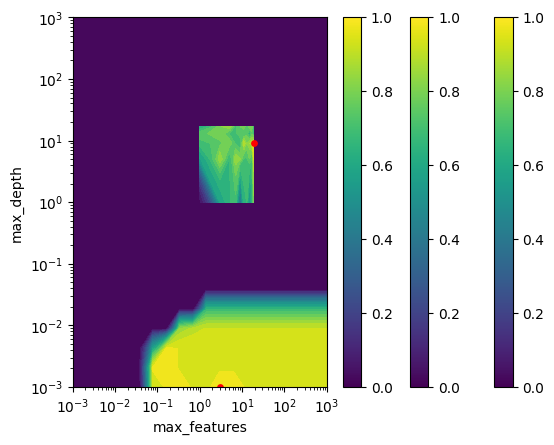

best parameters with f1 metric :  {'max_depth': 1, 'max_features': 5}


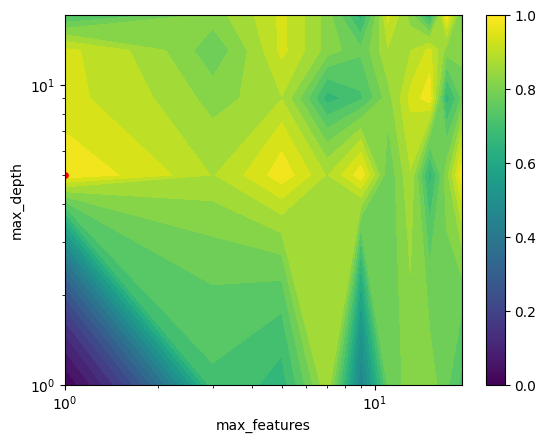

f1 score for random forest on testing :  0.9503546099290779
accuracy score for random forest on testing :  0.954248366013072


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [71]:
param_grid_rbf = {'C' : np.logspace(-3,3,20),
                  'gamma': np.logspace(-3,3,20)}

scoring_f1 = 'f1'
scoring_accuracy = 'accuracy'

#Applying grid search for F1-Score
grid_search_rbf_f1 = GridSearchCV(estimator = SVC(kernel = 'rbf'), param_grid=param_grid_rbf, scoring=scoring_f1, cv=5)
grid_search_rbf_f1.fit(x_train, y_train)

#Applying grid search for accuracy
grid_search_rbf_notf1 = GridSearchCV(estimator = SVC(kernel = 'rbf'), param_grid=param_grid_rbf, scoring=scoring_accuracy, cv=5)
grid_search_rbf_notf1.fit(x_train, y_train)

f1_best_score = grid_search_rbf_f1.best_score_
accuracy_best_score = grid_search_rbf_notf1.best_score_
print('best score for rbf kernel with accuracy scoring : ', accuracy_best_score)
print('best score for rbf kernel with f1 scoring : ', f1_best_score)

print('best parameters with f1 metric : ', grid_search_rbf_f1.best_params_)
best_rbf = grid_search_rbf_f1.best_params_
C = grid_search_rbf_f1.cv_results_['param_C'].reshape((len(param_grid_rbf['C']), len(param_grid_rbf['gamma'])))
gamma = grid_search_rbf_f1.cv_results_['param_gamma'].reshape((len(param_grid_rbf['C']), len(param_grid_rbf['gamma'])))
x, y = C, gamma
plt.contourf(x,y,grid_search_rbf_f1.cv_results_['mean_test_score'][::1].reshape((len(param_grid_rbf['C']), len(param_grid_rbf['gamma']))),levels = 25)
plt.scatter(best_rbf['C'], best_rbf['gamma'], s=15, c= 'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()

print('best parameters with accuracy metric : ', grid_search_rbf_notf1.best_params_)
best_rbf = grid_search_rbf_notf1.best_params_
C = grid_search_rbf_notf1.cv_results_['param_C'].reshape((len(param_grid_rbf['C']), len(param_grid_rbf['gamma'])))
gamma = grid_search_rbf_notf1.cv_results_['param_gamma'].reshape((len(param_grid_rbf['C']), len(param_grid_rbf['gamma'])))
x, y = C, gamma
plt.contourf(x,y,grid_search_rbf_notf1.cv_results_['mean_test_score'][::1].reshape((len(param_grid_rbf['C']), len(param_grid_rbf['gamma']))),levels = 25)
plt.scatter(best_rbf['C'], best_rbf['gamma'], s=15, c= 'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()

"""**Best Parameters for the rbf kernel are :**</br>
1) For accuracy metric: C = 0.1623776739188721, gamma = 0.004281332398719396 </br>
2) For f1 metric: C = 0.1623776739188721, gamma = 0.004281332398719396
"""

rbf_kernel_f1 = SVC(kernel = 'rbf', C = 0.1623776739188721, gamma = 0.004281332398719396)
rbf_kernel_f1.fit(x_train, y_train)

# Getting F1-score for SVR
y_pred_rbf_f1 = rbf_kernel_f1.predict(x_val)
f1_score_rbf_f1 = f1_score(y_pred_rbf_f1, y_val)
print('f1 score on testing for rbf kernel : ',f1_score_rbf_f1)


rbf_kernel_notf1 = SVC(kernel = 'rbf', C = 0.1623776739188721, gamma = 0.004281332398719396 )
rbf_kernel_notf1.fit(x_train, y_train)

# Getting accuracy score for SVR
y_pred_rbf_notf1 = rbf_kernel_notf1.predict(x_val)
f1_score_rbf_notf1 = accuracy_score(y_pred_rbf_notf1, y_val)
print('accuracy score on testing for rbf kernel : ',f1_score_rbf_notf1)

param_grid_rf = {
    'max_depth': range(1,20,2),
    'max_features' : range(1,20,4)
}

scoring_f1 = 'f1'
scoring_accuracy = 'accuracy'

#Applying grid search for F1-Score
grid_search_rf_f1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_grid_rf, scoring=scoring_f1, cv=5)
grid_search_rf_f1.fit(x_train, y_train)

#Applying grid search for accuracy
grid_search_rf_notf1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_grid_rf, scoring=scoring_accuracy, cv=5)
grid_search_rf_notf1.fit(x_train, y_train)

f1_best_score = grid_search_rf_f1.best_score_
accuracy_best_score = grid_search_rf_notf1.best_score_
print('best score for random forest with accuracy scoring : ', accuracy_best_score)
print('best score for random forest with f1 scoring : ', f1_best_score)

best_rf_f1 = grid_search_rf_f1.best_params_
print('best parameters with f1 metric : ', grid_search_rf_f1.best_params_)

max_depth = grid_search_rf_f1.cv_results_['param_max_depth'].reshape((len(param_grid_rf['max_depth']), len(param_grid_rf['max_features'])))
max_features = grid_search_rf_f1.cv_results_['param_max_features'].reshape((len(param_grid_rf['max_depth']), len(param_grid_rf['max_features'])))
x, y = max_depth, max_features
plt.contourf(x,y,grid_search_rf_f1.cv_results_['mean_test_score'][::1].reshape((len(param_grid_rf['max_depth']), len(param_grid_rf['max_features']))),levels = 25)
plt.scatter([best_rf_f1['max_depth']], [best_rf_f1['max_features']], s=15, c= 'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.colorbar()
plt.show()
best_rf_notf1 = grid_search_rf_notf1.best_params_
print('best parameters with f1 metric : ', grid_search_rf_notf1.best_params_)

max_depth = grid_search_rf_notf1.cv_results_['param_max_depth'].reshape((len(param_grid_rf['max_depth']), len(param_grid_rf['max_features'])))
max_features = grid_search_rf_notf1.cv_results_['param_max_features'].reshape((len(param_grid_rf['max_depth']), len(param_grid_rf['max_features'])))
x, y = max_depth, max_features
plt.contourf(x,y,grid_search_rf_notf1.cv_results_['mean_test_score'][::1].reshape((len(param_grid_rf['max_depth']), len(param_grid_rf['max_features']))),levels = 25)
plt.scatter([best_rf_notf1['max_depth']], [best_rf_notf1['max_features']], s=15, c= 'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.colorbar()
plt.show()
"""**Best Parameters for the Random Forest Classifier are :
1) For accuracy metric: max_depth = 5, max_features = 9
2) For f1 metric: max_depth = 19, max_features = 5
"""

rff_f1 = RandomForestClassifier(max_depth = 5, max_features = 9)
rff_f1.fit(x_train, y_train)

y_pred_f1 = rff_f1.predict(x_val)
f1_score_rf = f1_score(y_pred_f1, y_val)
print('f1 score for random forest on testing : ', f1_score_rf)

rff_notf1 = RandomForestClassifier(max_depth = 19, max_features = 5)
rff_notf1.fit(x_train, y_train)

y_pred_notf1 = rff_notf1.predict(x_val)
accuracy_score_rf = accuracy_score(y_pred_notf1, y_val)
print('accuracy score for random forest on testing : ',accuracy_score_rf)

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# # Here the size of each output sample is set to 2.
# # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
# model_ft.fc = nn.Linear(num_ftrs, 2)

# model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# # Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

### Train and evaluate
#It should take around 15-25 min on CPU. On GPU though, it takes less than a minute.
